In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn import tree
from  sklearn.tree  import  DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [39]:
df = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/train_titanic.csv')
df1 = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/test_titanic.csv')
df2 = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/gender_submission.csv')

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
y = df.Survived
X = df.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [8]:
clf2 = tree.DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='entropy')


In [17]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [18]:
X = X.fillna({'Age': X.Age.median()})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=37)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.982839313572543
0.768


In [8]:
max_depth_values = range(1,35)
scores_data = pd.DataFrame()

In [24]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [25]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.784711,0.792,0.784826
0,2,0.804992,0.760,0.794128
0,3,0.834633,0.820,0.808277
0,4,0.848674,0.820,0.820607
0,5,0.851794,0.824,0.815956
0,6,0.856474,0.808,0.803333
0,7,0.865835,0.820,0.801856
0,8,0.876755,0.808,0.791027
0,9,0.892356,0.808,0.797326
0,10,0.904836,0.800,0.801953


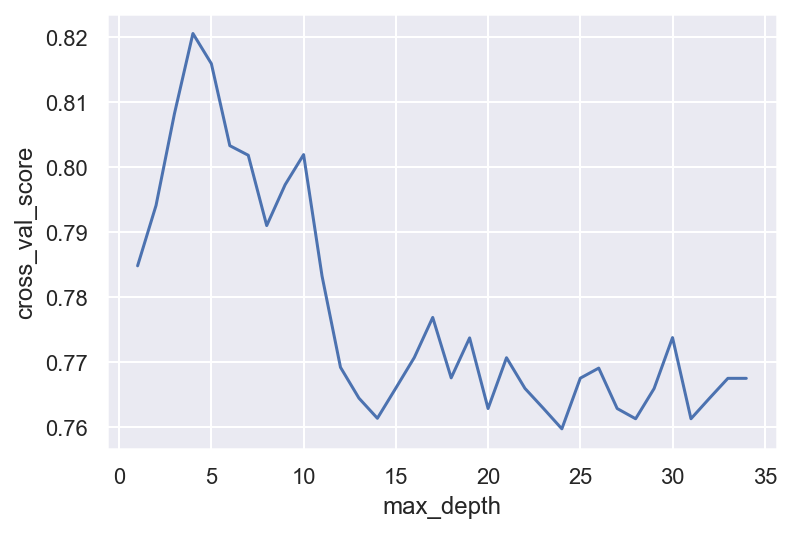

In [33]:
sns.lineplot(x="max_depth", y="cross_val_score", data=scores_data)

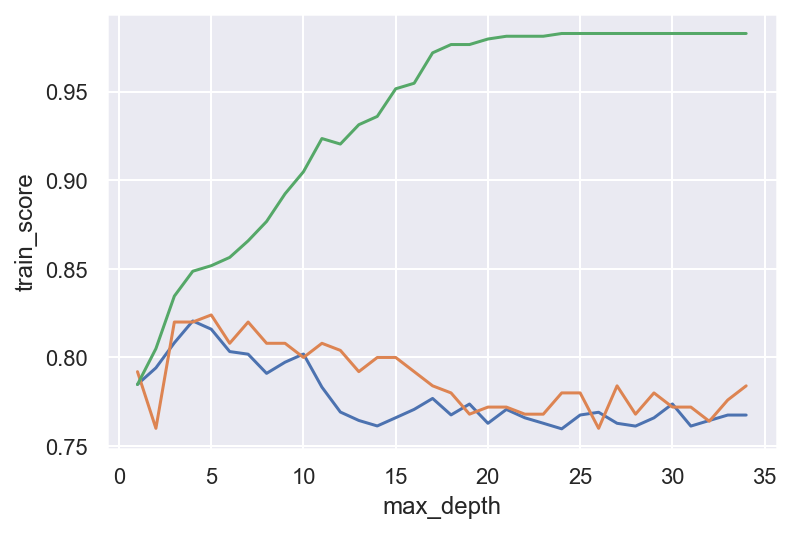

In [35]:
def pls():
    sns.lineplot(x="max_depth", y="cross_val_score", data=scores_data)
    sns.lineplot(x="max_depth", y="test_score", data=scores_data)
    sns.lineplot(x="max_depth", y="train_score", data=scores_data)
pls()

In [26]:
clf5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf9 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
clf10 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [27]:
print(cross_val_score(clf5, X_test, y_test, cv=5).mean())

0.7516478591436574


In [28]:
print(cross_val_score(clf4, X_test, y_test, cv=5).mean())
print(cross_val_score(clf9, X_test, y_test, cv=5).mean())

0.7515662264905962
0.8115758303321329


In [29]:
print(cross_val_score(clf10, X_test, y_test, cv=5).mean())

0.7675694277711085


In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [11]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [12]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [13]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [14]:
best_clf = grid_search_cv_clf.best_estimator_

In [15]:
best_clf.score(X_test, y_test)

0.816

In [16]:
from sklearn.metrics import precision_score, recall_score

In [17]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.8222222222222222

In [18]:
recall_score(y_test, y_pred)

0.7115384615384616

In [21]:
# Сохраним в переменную вероятность отнесения к какому-либо классу
y_pred_prob = best_clf.predict_proba(X_test)

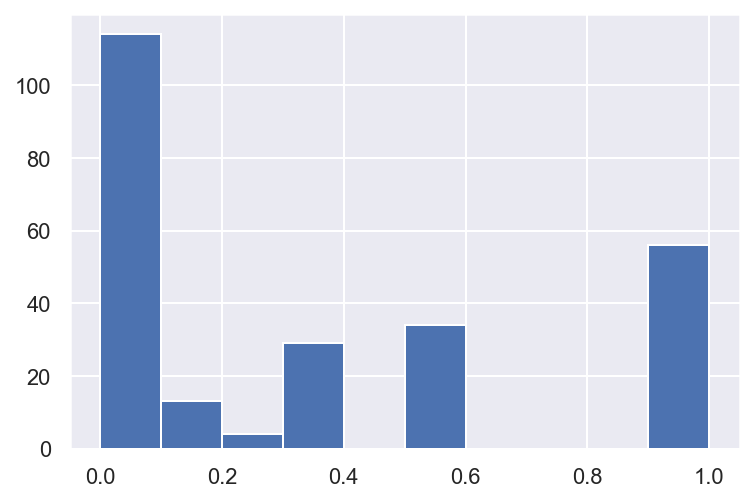

In [23]:
pd.Series(y_pred_prob[:, 1]).hist()


In [24]:
# Если наша вероятность больше 0.8, то отнесём к классу выживших(1), иначе (0) 
np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1])

In [29]:
y_pred2 = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)
precision_score(y_test, y_pred2)

0.9285714285714286

Пресижен стал больше

In [30]:
recall_score(y_test, y_pred2)

0.5

Рекол сильно упал 

In [31]:
y_pred3 = np.where(y_pred_prob[:, 1] > 0.3, 1, 0)
precision_score(y_test, y_pred3)

0.7310924369747899

Пресижен стал меньше 

In [32]:
recall_score(y_test, y_pred3)

0.8365384615384616

Рекол увеличился 

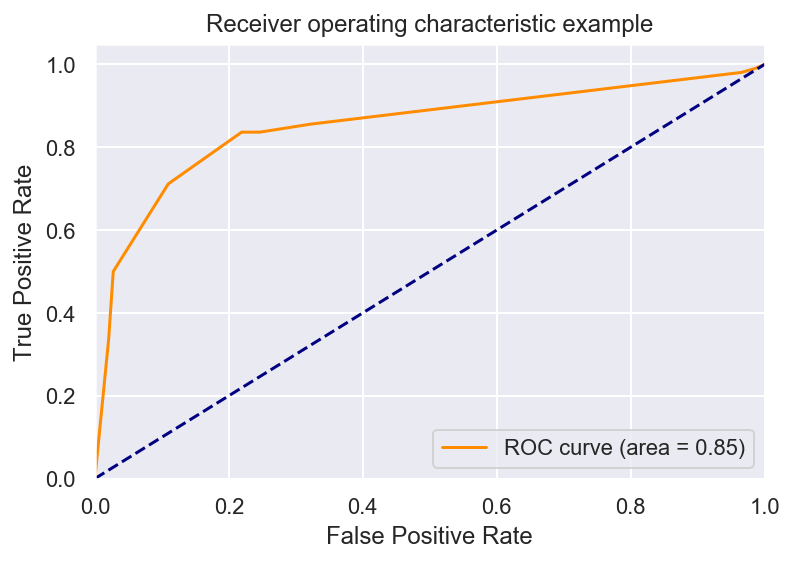

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier()

In [13]:
parametrs = {'n_estimators': [20, 30, 40, 50], 'max_depth': [3, 4, 5, 7, 9]}

In [19]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=5)

In [20]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [21]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 40}

In [22]:
best_rf = grid_search_cv_clf.best_estimator_

In [29]:
x1 = df1.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)
x1 = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [37]:
df2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
df_test = df2.drop(['PassengerId'], axis=1)
df_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [53]:
a = best_rf.predict(x1)

In [44]:
best_rf.score(X_test, y_test)

0.88